In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as sst
import statsmodels.api as sm
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()
import datetime

In [2]:
tickers = ['KO','PEP','^GSPC']
sec_data = pd.DataFrame()
for t in tickers:
    sec_data[t] = pdr.DataReader(t, data_source='yahoo', start='1990-1-1')['Adj Close']
sec_data.head()

,KO,PEP,^GSPC
Date,,,
1990-01-02,1.094622,4.789035,359.690002
1990-01-03,1.078834,4.742450,358.760010
1990-01-04,1.073572,4.695862,355.670013
1990-01-05,1.064800,4.630643,352.200012
1990-01-08,1.087606,4.714498,353.790009


In [3]:
sec_returns = (sec_data/sec_data.shift(1))-1
sec_returns=sec_returns.dropna(axis=0, how='any')
sec_returns.head()

,KO,PEP,^GSPC
Date,,,
1990-01-03,-0.014424,-0.009727,-0.002586
1990-01-04,-0.004878,-0.009824,-0.008613
1990-01-05,-0.008170,-0.013889,-0.009756
1990-01-08,0.021418,0.018109,0.004514
1990-01-09,-0.008065,-0.013834,-0.011787


In [4]:
sec_returns.describe()
cov_matrix = sec_returns.cov()
print(cov_matrix)
sec_returns.corr()

             KO       PEP     ^GSPC
KO     0.000198  0.000107  0.000078
PEP    0.000107  0.000213  0.000074
^GSPC  0.000078  0.000074  0.000122


,KO,PEP,^GSPC
KO,1.000000,0.520215,0.498074
PEP,0.520215,1.000000,0.458999
^GSPC,0.498074,0.458999,1.000000


In [5]:
print(sec_returns.mean()*250)
print(sec_returns.std()*(250**0.5))

KO       0.151809
PEP      0.134972
^GSPC    0.084997
dtype: float64
KO       0.222639
PEP      0.230980
^GSPC    0.174781
dtype: float64


In [6]:
sec_returns.var()

KO       0.000198
PEP      0.000213
^GSPC    0.000122
dtype: float64

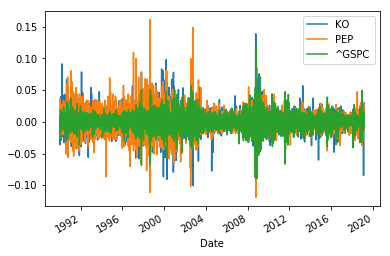

In [7]:
sec_returns.plot()

In [8]:
sec_returns.kurtosis()

KO       6.429649
PEP      8.534901
^GSPC    8.923971
dtype: float64

In [9]:
sec_returns.skew()

KO       0.204759
PEP      0.441316
^GSPC   -0.078908
dtype: float64

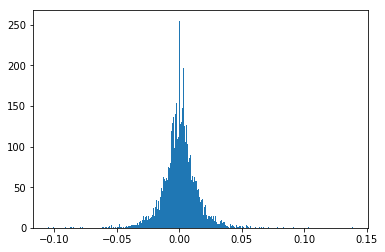

In [10]:
H1=sec_returns['KO']
plt.hist(H1,bins=500)
plt.show()

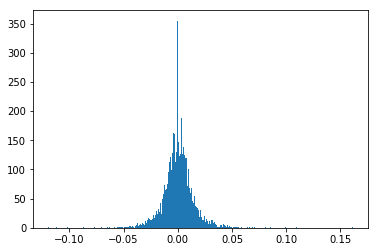

In [11]:
H1=sec_returns['PEP']
plt.hist(H1,bins=500)
plt.show()

Use KO and PEP to formulate two portfolios with same risk equal to S&P 500

In [12]:
VAR=sec_returns.var()*250
Wtal=(VAR[2]/VAR[0])**0.5
print(f'The weight of KO is {Wtal}')

The weight of KO is 0.7850426456693923


In [13]:
VAR=sec_returns.var()*250
Wta2=(VAR[2]/VAR[1])**0.5
print(f'The weight of PEP is {Wta2}')

The weight of PEP is 0.7566928971505252


In [14]:
Return1=sec_returns.mean()*250
P1=Return1[0]*Wtal+(1-Wtal)*0.03
print(f'The return of portfolio 1 is {P1}')

The return of portfolio 1 is 0.12562538050035138


In [15]:
Return2=sec_returns.mean()*250
P2=Return2[1]*Wta2+(1-Wta2)*0.03
print(f'The return of portfolio 2 is {P2}')

The return of portfolio 2 is 0.10943148859733846


In [16]:
SR1=((P1-0.03)/250)/(sec_returns['^GSPC'].std())
print(f'Sharpe ratio of KO portfolio is {SR1}')

Sharpe ratio of KO portfolio is 0.0346026590462961


In [17]:
SR2=((P2-0.03)/250)/(sec_returns['^GSPC'].std())
print(f'Sharpe ratio PEP portfolio is {SR2}')

Sharpe ratio PEP portfolio is 0.028742795093645246


Assume two hypotheses to test KO is better than PEP and S&P 500

In [18]:
sst.ttest_ind(a=sec_returns['KO'],b=sec_returns['^GSPC'],equal_var=False) 

Ttest_indResult(statistic=1.2802262247510139, pvalue=0.20048691636398935)

In [19]:
sst.ttest_ind(a=sec_returns['KO'],b=sec_returns['PEP'],equal_var=False) 

Ttest_indResult(statistic=0.2846518878454694, pvalue=0.775914867703192)

In [20]:
sst.ttest_1samp(a=sec_returns['KO'], popmean=0)

Ttest_1sampResult(statistic=3.6981908473090424, pvalue=0.00021872375136041156)

In [21]:
sst.ttest_1samp(a=sec_returns['PEP'], popmean=0)

Ttest_1sampResult(statistic=3.1692837080970238, pvalue=0.0015344164804524051)

In [22]:
sst.ttest_1samp(a=sec_returns['KO']-sec_returns['^GSPC'], popmean=0)

Ttest_1sampResult(statistic=1.781937061927836, pvalue=0.07480075229782625)

In [23]:
sst.ttest_1samp(a=sec_returns['PEP']-sec_returns['^GSPC'], popmean=0)

Ttest_1sampResult(statistic=1.252381808384042, pvalue=0.21047060295477554)

In [24]:
sst.ttest_rel(a=sec_returns['KO']-sec_returns['^GSPC'], b=sec_returns['PEP']-sec_returns['^GSPC'])

Ttest_relResult(statistic=0.410801238889035, pvalue=0.6812302553319656)

In [25]:
ff=pdr.DataReader('F-F_Research_Data_Factors_daily','famafrench')[0]
all=pd.merge(sec_returns*100,ff,left_index=True,right_index=True)
all['KO-RF']=all['KO']-all['RF']
all['PEP-RF']=all['PEP']-all['RF']
all.describe()

,KO,PEP,^GSPC,Mkt-RF,SMB,HML,RF,KO-RF,PEP-RF
count,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000
mean,0.042517,0.043014,0.043273,0.051042,0.002101,-0.007195,0.001418,0.041100,0.041597
std,0.917812,0.899762,0.947638,0.975069,0.522881,0.494597,0.002461,0.917816,0.899815
min,-6.029115,-4.592185,-6.663446,-6.970000,-2.000000,-1.830000,0.000000,-6.029115,-4.592185
25%,-0.439607,-0.453728,-0.337930,-0.360000,-0.330000,-0.310000,0.000000,-0.439816,-0.453728
50%,0.049568,0.043157,0.054917,0.070000,0.000000,-0.030000,0.000000,0.049508,0.038688
75%,0.552342,0.551458,0.503589,0.530000,0.330000,0.260000,0.001000,0.552342,0.550487
max,5.687243,4.760581,4.959374,5.060000,3.610000,2.380000,0.010000,5.687243,4.752581


In [27]:
X=all[['Mkt-RF','SMB','HML']]
X1=sm.add_constant(X)
reg=sm.OLS(all['PEP-RF'],X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PEP-RF   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     375.1
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          4.95e-198
Time:                        09:12:22   Log-Likelihood:                -2542.4
No. Observations:                2285   AIC:                             5093.
Df Residuals:                    2281   BIC:                             5116.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0131      0.015      0.845      0.398      -0.017       0.043
Mkt-RF         0.5652      0.017     33.364      0.000       0.532       0.598
SMB           -0.4225      0.031    -13.436      0.000      -0.484      -0.361
HML           -0.0811      0.032     -2.565      0.010      -0.143      -0.019
==============================================================================
Omnibus:                      196.875   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1222.328
Skew:                          -0.059   Prob(JB):                    3.76e-266
Kurtosis:                       6.581   Cond. No.                         2.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
reg=sm.OLS(all['PEP-RF'],X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PEP-RF   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     375.1
Date:                Mon, 11 Mar 2019   Prob (F-statistic):          4.95e-198
Time:                        22:14:31   Log-Likelihood:                -2542.4
No. Observations:                2285   AIC:                             5093.
Df Residuals:                    2281   BIC:                             5116.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0131      0.015      0.845      0.398      -0.017       0.043
Mkt-RF         0.5652      0.017     33.364      0.000       0.532       0.598
SMB           -0.4225      0.031    -13.436      0.000      -0.484      -0.361
HML           -0.0811      0.032     -2.565      0.010      -0.143      -0.019
==============================================================================
Omnibus:                      196.875   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1222.328
Skew:                          -0.059   Prob(JB):                    3.76e-266
Kurtosis:                       6.581   Cond. No.                         2.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
error = reg.resid
sm.stats.stattools.durbin_watson(error)

2.0535540125472354

In [30]:
sec_returns['exret']=sec_returns['KO']-sec_returns['^GSPC']
KO_events = pd.read_excel('KO_earningsdates.xlsx',index_col=0)
TT = pd.merge(sec_returns, KO_events, how='left', left_index=True, right_index=True)
window = 10
KO_events['KO_edate'] = KO_events.index
ccport=pd.DataFrame()
for event in KO_events['KO_edate']:
    date_loc = TT.index.get_loc(event) 
    date_loc1= date_loc-window
    date_loc2= date_loc+window+1 
    temp= TT['exret'][date_loc1:date_loc2] 
    temp = temp.reset_index(drop=True) 
    ccport = ccport.reset_index(drop=True) 
    ccport = pd.concat([ccport, temp], axis=1, ignore_index=True) 
KO_aar=[] 
KO_car=[] 
KO_sum=0 
for i in range(2*window +1):
    temp = ccport.loc[i,:].mean()
    KO_sum=KO_sum+temp
    KO_aar.append(temp)
    KO_car.append(KO_sum)

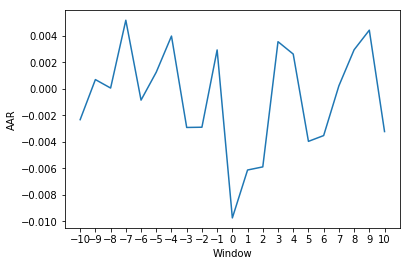

In [31]:
x=range(-10,11,1)
plt.plot(x,KO_aar)
plt.ylabel('AAR')
plt.xlabel('Window')
plt.xticks(x)
plt.show()

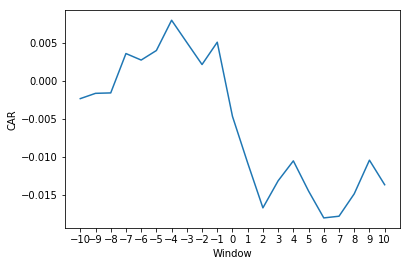

In [32]:
plt.plot(x,KO_car)
plt.ylabel('CAR')
plt.xlabel('Window')
plt.xticks(x)
plt.show()

In [33]:
sec_returns['exret']=sec_returns['PEP']-sec_returns['^GSPC']
PEP_events = pd.read_excel('PEP_earningsdates.xlsx',index_col=0)
TT2 = pd.merge(sec_returns, PEP_events, how='left', left_index=True, right_index=True)
window = 10
PEP_events['PEP_edate'] = PEP_events.index
pport=pd.DataFrame()
for event in PEP_events['PEP_edate']:
    date_loc = TT2.index.get_loc(event) 
    date_loc1= date_loc-window 
    date_loc2= date_loc+window+1 
    temp= TT2['exret'][date_loc1:date_loc2] 
    temp = temp.reset_index(drop=True) 
    pport = pport.reset_index(drop=True) 
    pport = pd.concat([pport, temp], axis=1, ignore_index=True) 
PEP_aar=[] 
PEP_car=[] 
PEP_sum=0 
for i in range(2*window +1):
    temp = pport.loc[i,:].mean()
    PEP_sum=PEP_sum+temp
    PEP_aar.append(temp)
    PEP_car.append(PEP_sum)

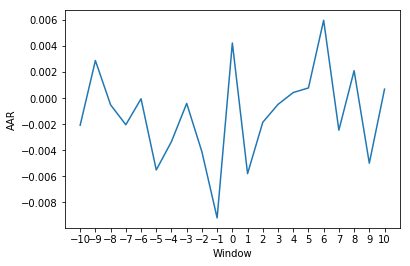

In [34]:
x=range(-10,11,1)
plt.plot(x,PEP_aar)
plt.ylabel('AAR')
plt.xlabel('Window')
plt.xticks(x)
plt.show()

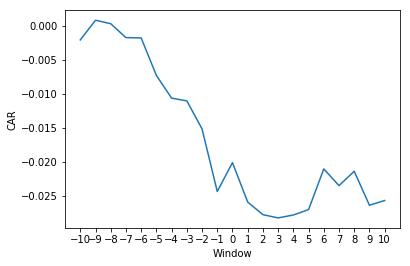

In [35]:
plt.plot(x,PEP_car)
plt.ylabel('CAR')
plt.xlabel('Window')
plt.xticks(x)
plt.show()

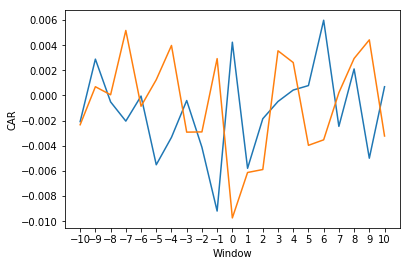

In [36]:
plt.plot(x,PEP_aar)
plt.plot(x,KO_aar)

plt.ylabel('CAR')
plt.xlabel('Window')
plt.xticks(x)
plt.show()

In [37]:
ccport == pport

,0,1,2,3,4,5,6,7,8
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [38]:
ccq12019 = ccport[0]
ccq22018 = ccport[3]
ccq12018 = ccport[4]
ccq22017 = ccport[7]

In [39]:
pq12019 = pport[0]
pq22018 = pport[3]
pq12018 = pport[4]
pq22017 = pport[7]


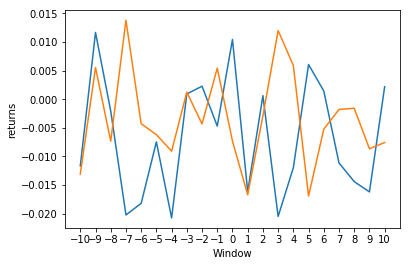

In [40]:
plt.plot(x, pq22018)
plt.plot(x, ccq22018)
plt.ylabel('returns')
plt.xlabel('Window')
plt.xticks(x)
plt.show()

In [42]:
x1 = pd.Series(pd.date_range('2019-2-4', freq = 'd', periods = 21))
y1 = pd.Series(pd.date_range('2019-2-5', freq = 'd', periods = 21))

x2 = pd.Series(pd.date_range('2018-2-6', freq = 'd', periods = 21))
y2 = pd.Series(pd.date_range('2018-2-3', freq = 'd', periods = 21))

x3 = pd.Series(pd.date_range('2017-4-15', freq = 'd', periods = 21))
y3 = pd.Series(pd.date_range('2017-4-16', freq = 'd', periods = 21))

x4 = pd.Series(pd.date_range('2018-4-14', freq = 'd', periods = 21))
y4 = pd.Series(pd.date_range('2018-4-16', freq = 'd', periods = 21))

In [43]:
pq12019 = pd.DataFrame(pq12019)
pq12018 = pd.DataFrame(pq12019)
pq22017 = pd.DataFrame(pq22017)
pq22018 = pd.DataFrame(pq22018)

pq12019 = pq12019.set_index(y1)
pq12018 = pq12018.set_index(y2)
pq22017 = pq22017.set_index(y3)
pq22018 = pq22018.set_index(y4)

In [44]:
ccq12019 = pd.DataFrame(ccq12019)
ccq12018 = pd.DataFrame(ccq12019)
ccq22017 = pd.DataFrame(ccq22017)
ccq22018 = pd.DataFrame(ccq22018)

ccq12019 = ccq12019.set_index(x1)
ccq12018 = ccq12018.set_index(x2)
ccq22017 = ccq22017.set_index(x3)
ccq22018 = ccq22018.set_index(x4)

In [48]:
pd.datetime.today(datetime.datetime(2019, 2, 4), periods = 19).to

TypeError: today() takes no keyword arguments

In [50]:
import datetime
datetime.datetime(2019, 3, 11, 17, 6, 42, 746909)

datetime.datetime(2019, 3, 11, 17, 6, 42, 746909)

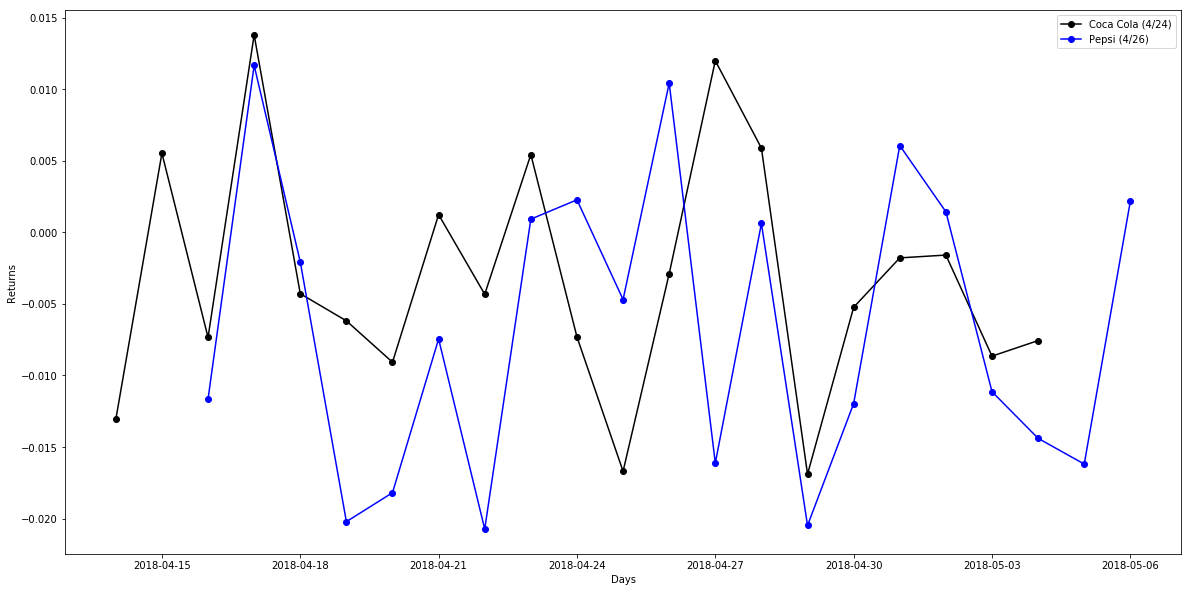

In [51]:
plt.figure(figsize = (20,10))
plt.xlabel('Days')
plt.ylabel('Returns')
plt.plot(ccq22018, '-ok', label = "Coca Cola (4/24)")
plt.plot(pq22018, '-ob', label="Pepsi (4/26)")
plt.legend(loc = 'upper right')


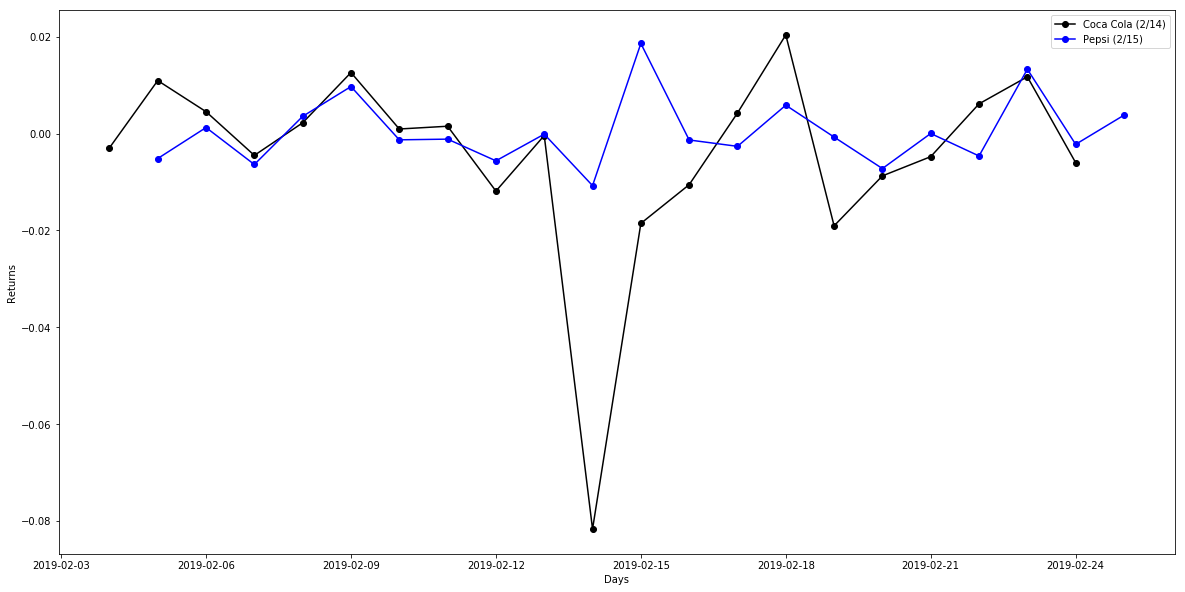

In [52]:
plt.figure(figsize = (20,10))
plt.xlabel('Days')
plt.ylabel('Returns')
plt.plot(ccq12019, '-ok', label = "Coca Cola (2/14)")
plt.plot(pq12019, '-ob', label="Pepsi (2/15)")
plt.legend(loc = 'upper right')

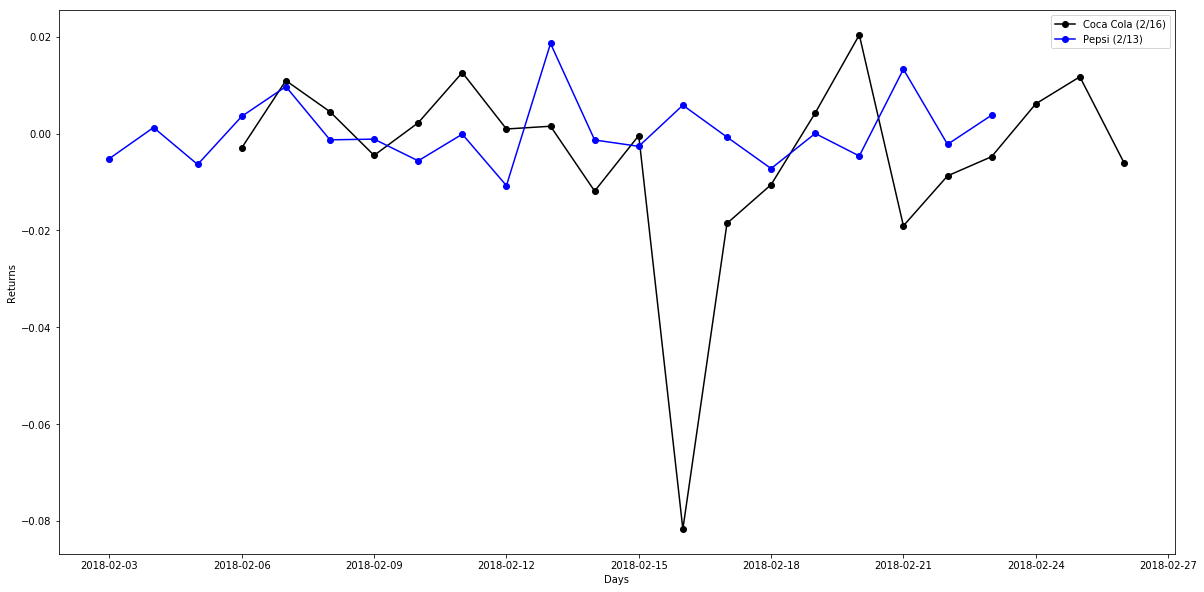

In [53]:
plt.figure(figsize = (20,10))
plt.xlabel('Days')
plt.ylabel('Returns')
plt.plot(ccq12018, '-ok', label = "Coca Cola (2/16)")
plt.plot(pq12018, '-ob', label="Pepsi (2/13)")
plt.legend(loc = 'upper right')

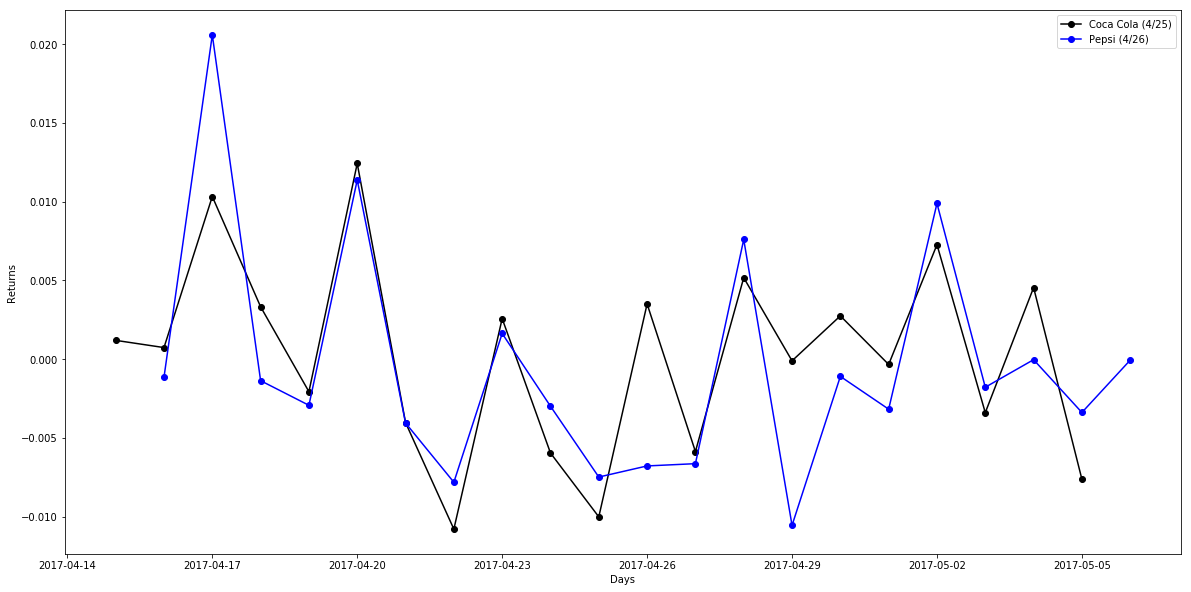

In [54]:
plt.figure(figsize = (20,10))
plt.xlabel('Days')
plt.ylabel('Returns')
plt.plot(ccq22017, '-ok', label = "Coca Cola (4/25)")
plt.plot(pq22017, '-ob', label="Pepsi (4/26)")
plt.legend(loc = 'upper right')

In [55]:
error = reg.resid

In [56]:
sm.stats.durbin_watson(error)

2.0535540125472354

In [57]:
sm.stats.diagnostic.het_breuschpagan(error, X1)

(7.541856499682082,
 0.056492676909160926,
 2.517861813746247,
 0.05646992654006572)